## Observations and Insights 

1) Capomulin and Ramicane had the greatest effect on tumor reduction.
2) Ceftamin and Infubinol both led to considerable tumor growth
3) Dataset is imperfect due to the deaths of many mice in less effective drugs. Either the deaths should be considered a separate metric or a larger sample size for each drug.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata,study_results,how = 'outer',on = 'Mouse ID')
# Display the data table for preview
combined_dataset.head(10);

In [2]:
# Checking the number of mice.
num_of_mice = len(combined_dataset['Mouse ID'].unique())

In [3]:
#Copying the combined dataset to protect original
combined_dataset_one = combined_dataset.copy().copy()

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Gets the index of the duplicate entry from the combined data set
duplicate_entry_index = combined_dataset_one.duplicated().loc[combined_dataset_one.duplicated() == True].index
#Identifies mouse object by index position in combined dataset
id_by_index = combined_dataset_one.loc[duplicate_entry_index]
#Stores Mouse ID of mouse object with duplicate entry in variable 'neo'
neo = id_by_index['Mouse ID']

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
#Stores all associate mouse data in variable 'mary'
mary = combined_dataset_one.loc[combined_dataset_one['Mouse ID'] == neo.item() ]

In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_dataset_one.drop(mary.index)
clean_df[clean_df['Timepoint'] == 0]['Tumor Volume (mm3)'].mean()

45.0

In [62]:
# Checking the number of mice in the clean DataFrame.
clean_number = len(clean_df['Mouse ID'].unique())

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create describe table, remove unnecessary columns, rename, rearrange, input Var and SEM columns
clean_grouped = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
clean_grouped = clean_grouped.rename(columns={'50%':'Median','mean':'Mean','std':'St. Dev'})
clean_grouped = clean_grouped[['Mean','St. Dev','Median']]
clean_grouped['Var'] = [st**2 for st in clean_grouped['St. Dev']]
clean_grouped['SEM'] = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_grouped

,Mean,St. Dev,Median,Var,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

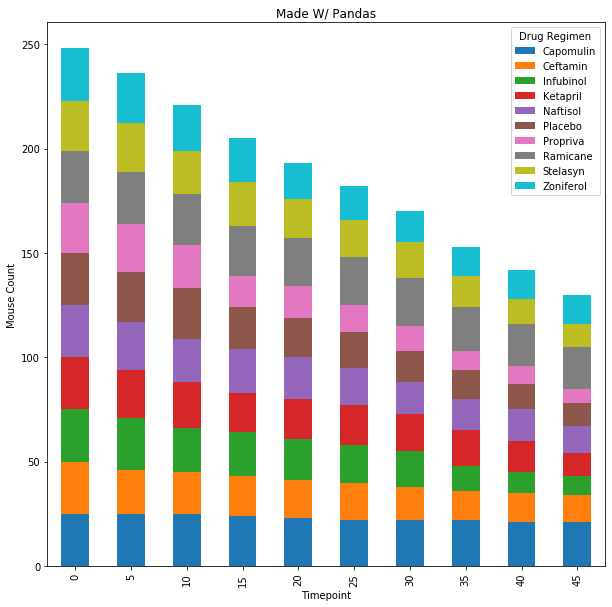

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

ax = clean_df.groupby(['Timepoint','Drug Regimen'])['Mouse ID'].count().unstack('Drug Regimen').plot(kind = 'bar',
                                                                                                stacked = True,
                                                                                                title= 'Made W/ Pandas',
                                                                                                figsize=(10,10))

ax.set_ylabel('Mouse Count');

In [11]:
stacks = clean_df.groupby(['Drug Regimen','Timepoint'])['Mouse ID'].count().unstack()
stacks.head(50);

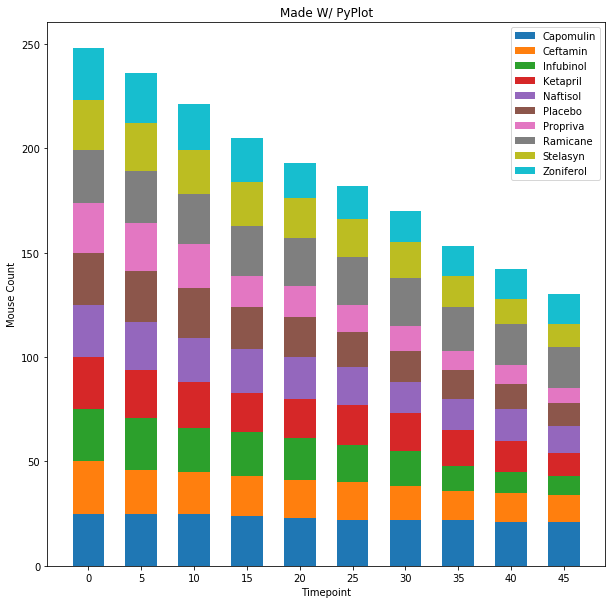

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig2, ax2 = plt.subplots(figsize = (10,10))
labels = clean_df['Timepoint'].unique()
[ax2.bar(labels,stacks.iloc[i,:],bottom = (stacks.iloc[0:i]).sum(),width = 3,tick_label = labels) for i in range(len(stacks.index))]
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Mouse Count')
ax2.set_title('Made W/ PyPlot')
ax2.legend(stacks.index);


In [13]:
gender_test = clean_df.copy().copy()
gender_test = gender_test.drop_duplicates(subset = ['Mouse ID'])
gender_test['Sex'].value_counts();

# Generate a pie plot showing the distribution of female versus male mice using pandas



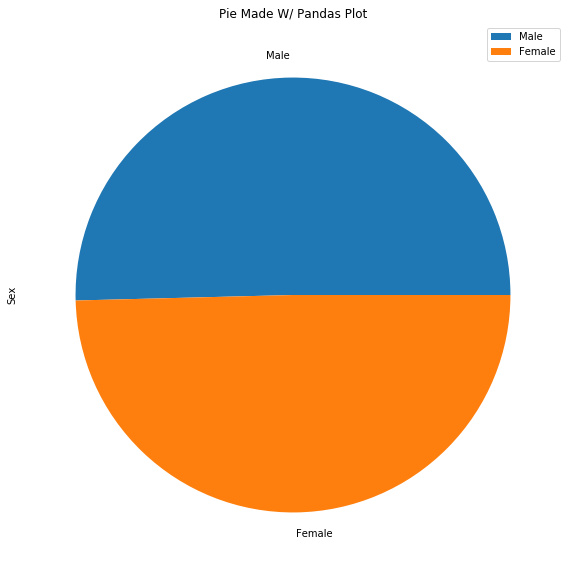

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_test['Sex'].value_counts().plot(kind = 'pie',title = 'Pie Made W/ Pandas Plot', legend = gender_test['Sex'].all, figsize = (10,10));


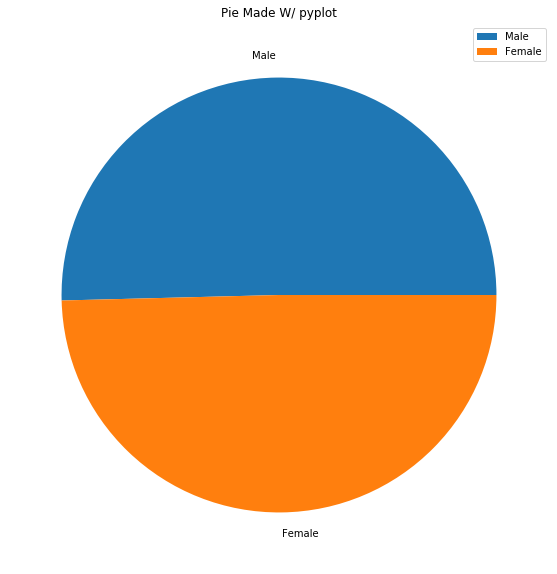

In [43]:
fig4, ax4 = plt.subplots(figsize = (10,10))
ax4.pie(gender_test['Sex'].value_counts(),labels = gender_test['Sex'].unique());
ax4.set_title('Pie Made W/ pyplot')
ax4.legend()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
the_four = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')| (clean_df['Drug Regimen'] == 'Ramicane')
                       | (clean_df['Drug Regimen'] == 'Infubinol') | (clean_df['Drug Regimen'] == 'Ceftamin')]
the_four = pd.merge(the_four,the_four.groupby(['Mouse ID','Timepoint']).filter(lambda x:x['Timepoint'] == 45)[['Mouse ID','Tumor Volume (mm3)']],on = 'Mouse ID', how = 'outer')
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
the_four_df = the_four.rename(columns = {'Tumor Volume (mm3)_y': 'Final Tumor Volume (mm3)'})
the_four_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [89]:
qob.sort_values(by = 'Final Tumor Volume (mm3)', ascending = False)[['Drug Regimen','Final Tumor Volume (mm3)']]

,Drug Regimen,Final Tumor Volume (mm3)
515,Infubinol,72.226731
579,Ceftamin,68.923185
784,Ceftamin,68.594745
454,Infubinol,67.973419
607,Ceftamin,67.748662
...,...,...
40,Ramicane,29.128472
20,Capomulin,28.484033
30,Capomulin,28.430964
10,Capomulin,23.343598


In [116]:
bandw = {x : hold.loc[hold['Drug Regimen'] == x]['Final Tumor Volume (mm3)'].values for x in hold['Drug Regimen'].unique()}
bandw

{'Ramicane': array([22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575,
        31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217,
        36.13485243, 38.81036633, 37.22565033, 36.37451039, 37.31123552,
        38.4076183 , 40.65900627, 40.66771292, 45.22086888, 43.0475426 ]),
 'Capomulin': array([23.34359787, 28.48403281, 28.43096411, 31.02392294, 31.8962384 ,
        32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736,
        37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.1251644 ,
        40.65812366, 40.1592203 , 40.72857787, 41.48300765, 41.58152074,
        47.68596303]),
 'Infubinol': array([67.97341878, 65.52574285, 66.08306589, 72.2267309 , 62.43540402,
        60.91876652, 66.19691151, 67.68556862, 62.75445141]),
 'Ceftamin': array([62.99935619, 61.84902336, 68.92318457, 67.74866174, 59.85195552,
        64.29983003, 59.74190064, 61.43389223, 67.52748237, 64.63494887,
        61.38666032, 68.59474498, 64.72983655])}

Capomulin Values below 20.70456164999999 and above 51.83201549 could be outliers
Ceftamin Values below 52.29350701999999 and above 76.66786758 could be outliers
Infubinol Values below 55.35777559500001 and above 75.08224443499999 could be outliers
Ramicane Values below 19.69048010125001 and above 49.799000431249986 could be outliers


[Text(0, 0.5, 'Tumor Volume'),
 Text(0.5, 0, 'Drug Regimen'),
 Text(0.5, 1.0, 'Boxplot')]

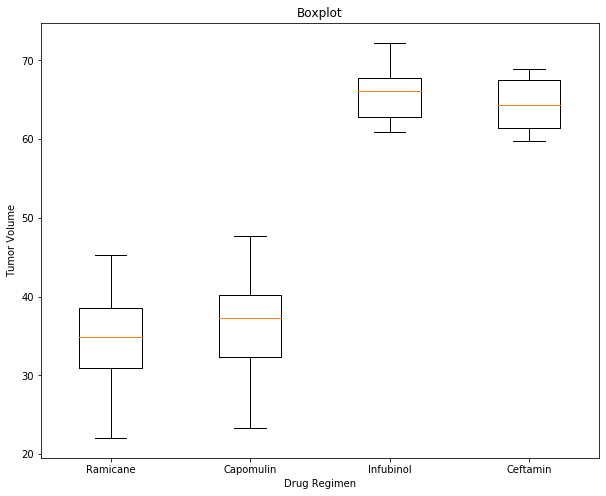

In [117]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
qob = the_four_df.drop_duplicates(subset = ['Mouse ID']).dropna(subset=['Final Tumor Volume (mm3)'])
hold = qob[['Drug Regimen','Final Tumor Volume (mm3)']]

myDict = {}

quartiles = hold.groupby('Drug Regimen')['Final Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

for row in quartiles.unstack().index:
    myDict[row] = quartiles.loc[row,:].values
    

    
# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 

# Determine outliers using upper and lower bounds
for key,values in myDict.items():
    
    
    lowerq = values[0]
    upperq = values[2]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'{key} Values below {lower_bound} and above {upper_bound} could be outliers')

data = [value for value in bandw.values()]
fig_q, ax_q = plt.subplots(figsize = (10,8))
ax_q.boxplot(data,labels = [key for key in bandw.keys()]);
ax_q.set(title = 'Boxplot',xlabel = 'Drug Regimen', ylabel = 'Tumor Volume')

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
s185 = the_four_df[(the_four_df['Drug Regimen'] == 'Capomulin') & (the_four_df['Mouse ID'] == 's185')]

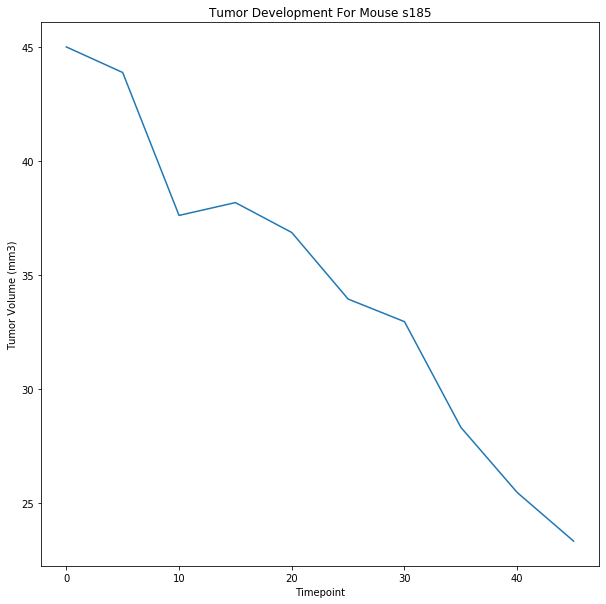

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
fig5, ax5 = plt.subplots(figsize =(10,10))
ax5.plot(s185['Timepoint'],s185['Tumor Volume (mm3)_x']);
ax5.set_xlabel('Timepoint')
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.set_title('Tumor Development For Mouse s185');

In [21]:
cap = the_four_df[(the_four_df['Drug Regimen'] == 'Capomulin')].dropna().set_index('Mouse ID').groupby('Weight (g)')
cap['Tumor Volume (mm3)_x'].mean();

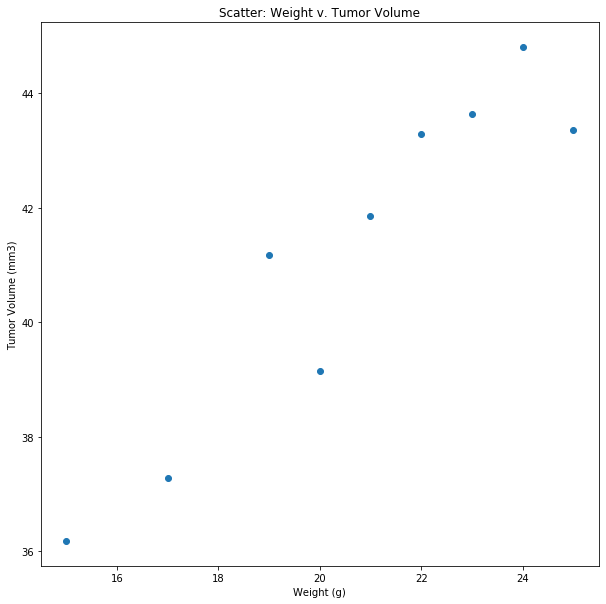

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig6, ax6 = plt.subplots(figsize = (10,10))
ax6.scatter(cap['Weight (g)'].unique(),cap['Tumor Volume (mm3)_x'].mean());
ax6.set_xlabel('Weight (g)')
ax6.set_ylabel('Tumor Volume (mm3)')
ax6.set_title('Scatter: Weight v. Tumor Volume');

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap['Weight (g)'].mean(),cap['Tumor Volume (mm3)_x'].mean())

Line Eq.: Tumor Volume = 0.86 * (Weight) + 23.33 
 R: 0.9364375671340095


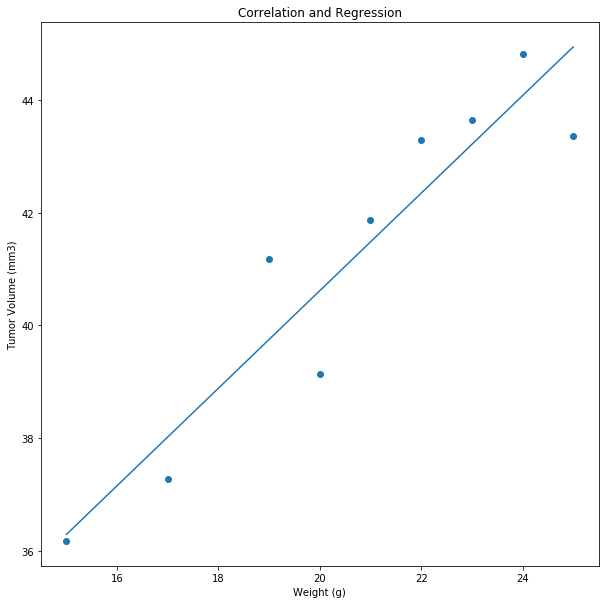

In [64]:
fig7, ax7 = plt.subplots(figsize = (10,10))
ax7.scatter(cap['Weight (g)'].unique(),cap['Tumor Volume (mm3)_x'].mean())
ax7.plot(cap['Weight (g)'].mean(),slope*cap['Weight (g)'].mean() + intercept);
ax7.set_xlabel('Weight (g)')
ax7.set_ylabel('Tumor Volume (mm3)')
ax7.set_title('Correlation and Regression')
print(f'Line Eq.: Tumor Volume = {round(slope,2)} * (Weight) + {round(intercept,2)} \n R: {rvalue}')